# Importing Modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# General Utilities

## Render Images

### Input: The images & their titles; other configuartions are optional

### Description: Since we'll be previewing alot of image (it's a computer vision course), it's quite handy to have a rendering function

In [2]:
def RenderImage(
    images: list[np.ndarray], titles: list[str], 
    nrows = 2, ncols = 3, figsize = (25, 10), cmap = 'gray'
    ) -> None:

    plt.subplots(figsize = figsize)
    for i in range((len(images))):
        plt.subplot(nrows, ncols, (i + 1))
        plt.title(titles[i], fontsize = 12, weight = 'bold')
        plt.imshow(images[i], cmap = cmap)

## Render Histograms

### Input: The images & their titles; other configurations are optional
### Description: Render image histograms for debugging purposes

In [3]:
def RenderHistograms(
    images: list[np.ndarray], titles: list[str],
    nrows = 2, ncols = 3, figsize = (25, 10), cumulative = False,
    useBins = True
    ) -> None:

    plt.subplots(figsize = figsize)
    for i in range(len(images)):
        plt.subplot(nrows, ncols, (i + 1))
        plt.title(titles[i], fontsize = 12, weight = 'bold')
        if useBins:
            plt.hist(images[i].flatten(), bins = np.arange(256), cumulative = cumulative)
        else:
            plt.hist(images[i].flatten(), cumulative = cumulative)
    
    plt.show()

## Transform To Grey Scale

### Input: Image 2D array & Color Weights (optional), by default is set to the weights of the specified rule

### Output: A 2D array representing the greyscale version of the image

### Description: Converting colored data to greyscale according to

$$I_{grey}(p) = 0.3 \times I_{red}(p) + 0.59 \times I_{green}(p) + 0.11 \times I_{blue}(p)$$

In [4]:
def TransformImage(image: np.ndarray, color_weights = [0.3, 0.59, 0.11]) -> np.ndarray:
    return image.dot(color_weights)

# Part I - Histogram Equalization

## Calculate Histogram

### Input: Image
### Output: Array of histogram counts
### Description: This method is responsible for calculating the normal histogram count at each different grey level with its number of pixels

In [5]:
def CalculateHistogram(image: np.ndarray) -> np.ndarray:
    return np.histogram(image.flatten(), bins = np.arange(257))[0]    # Well, that was too easy

## Calculate Cumulative Histogram

### Input: The output array of the method Calculate Histogram
### Output: Array of the cumulative histogram
### Description: In this method, you have to calculate the cumulative histogram by summing up the counts of the pixels ascendingly

In [6]:
def CalculateCumulativeHistogram(countHistogram: np.ndarray) -> np.ndarray:
    return countHistogram.cumsum()

## Calculate Equalized Histogram

### Input: The output array of method Calcuate Cumulative Histogram
### Output: Array of the new pixel intensities that correspond to the original ones
### Description: In this method, you are required to calculate the equalized histogram upon the following equation using the cumulative histogram calculated above

$$T(P) = \frac{255}{(N \times M) - [H_c(0)]} \times [H_c(P) - H_c(0)]$$

where $T(P)$ is the new intensity calculated for intensity $P$, $(N \times M)$ is the size of the image rows multiplied by columns, $H_c(P)$ is the cumulative histogram of the pixel intensity & $H_c(0)$ is the cumulative histogram of pixel intensity 0

In [7]:
def CalculateEqualizedHistogram(cumulativeHistogram: np.ndarray) -> np.ndarray:
    return (255 / (cumulativeHistogram[-1] - cumulativeHistogram[0])) * (cumulativeHistogram - cumulativeHistogram[0])

## Calculate Equalized Image

### Input: Original image & the output array of method Calculate Equalized Histogram
### Output: The equalized image
### Description: In this method, you are required to generate the new equalized image after manipulating the old pixel intensity values by the new values of intensities obtained after calculating the equalized histogram

In [8]:
def CalculateEqualizedImage(image: np.ndarray, equalizedHistorgram: np.ndarray) -> np.ndarray:
    return np.array([equalizedHistorgram[int(intensity)] for intensity in image.flatten()]).reshape(image.shape)

# Part II - Optimal Thresholding

## Segment Optimal Thresholding

### Input: Image
### Output: Segmented image
### Description: Implements the iterative optimal thresholding 

In [9]:
def SegmentOptimalThresholding(image: np.ndarray) -> np.ndarray:
    pass

# Part III - Putting Everything together

## Import Image Samples

In [10]:
image_1 = plt.imread('Samples/1.jpg')
image_2 = plt.imread('Samples/2.jpg')
image_3 = plt.imread('Samples/3.png')
image_4 = plt.imread('Samples/4.jpg')
image_5 = plt.imread('Samples/5.jpg')

## Converting to Greyscale

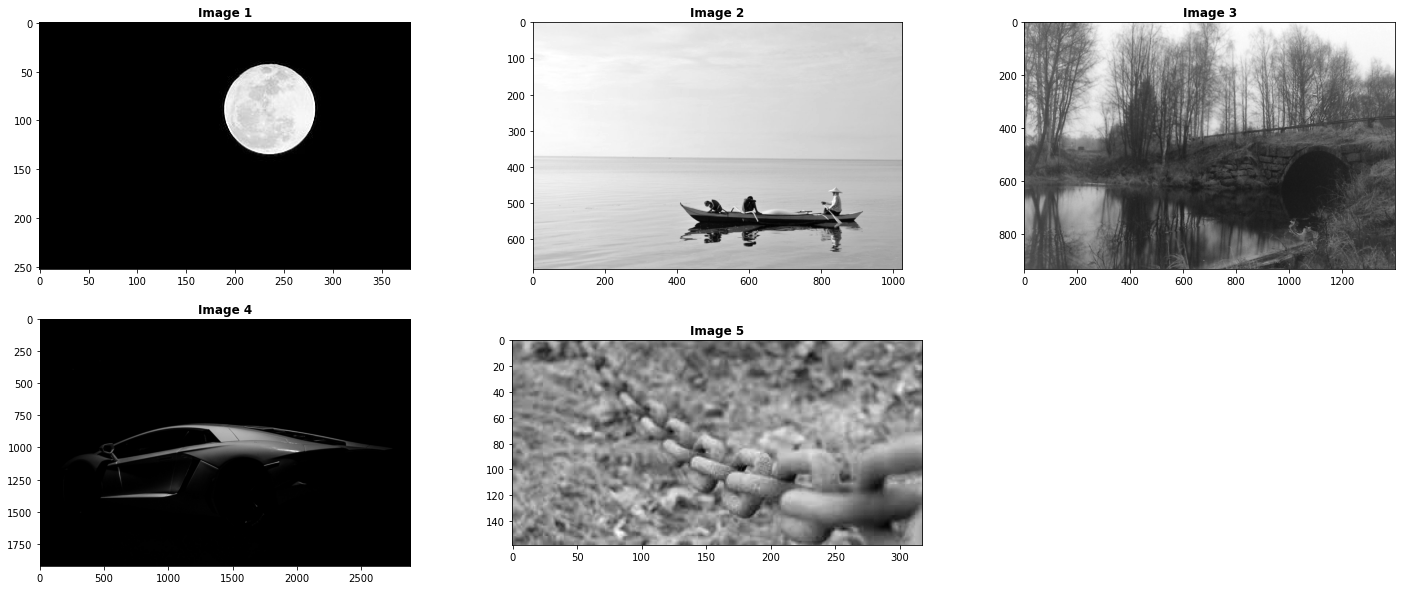

In [11]:
image_1 =  image_1.dot([0.3, 0.59, 0.11]) if image_1.ndim > 2 else image_1
image_2 =  image_2.dot([0.3, 0.59, 0.11]) if image_2.ndim > 2 else image_2
image_3 = (image_3.dot([0.3, 0.59, 0.11]) if image_3.ndim > 2 else image_3) * 255   # PNG pixel values ranges from 0 to 1
image_4 =  image_4.dot([0.3, 0.59, 0.11]) if image_4.ndim > 2 else image_4
image_5 =  image_5.dot([0.3, 0.59, 0.11]) if image_5.ndim > 2 else image_5

RenderImage(images = [image_1, image_2, image_3, image_4, image_5],
            titles = ['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5'])

## Image I - The Moon

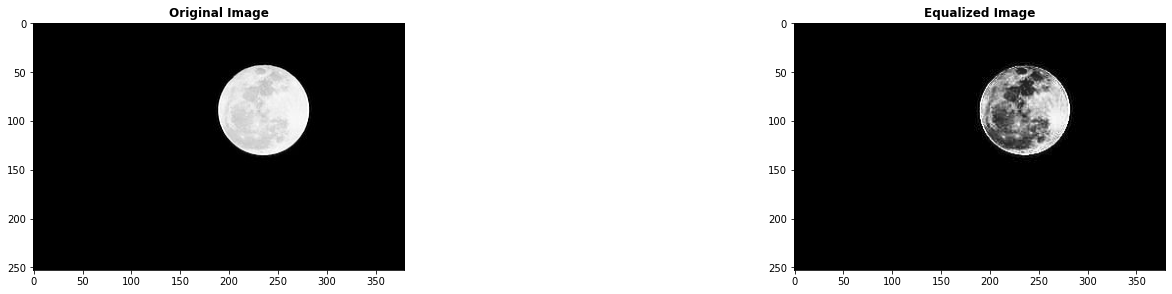

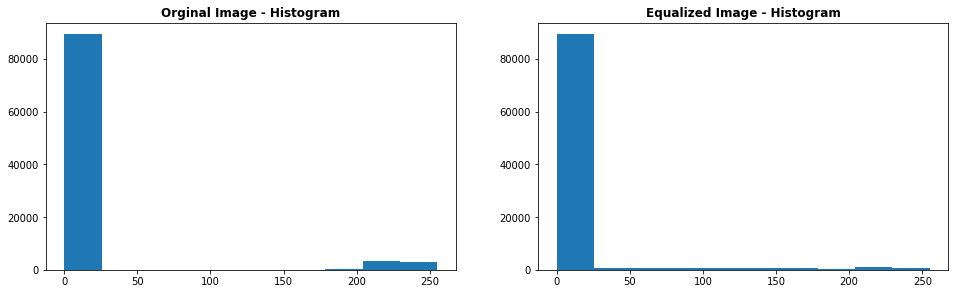

In [19]:
image_1_equalized = CalculateEqualizedImage(image_1, CalculateEqualizedHistogram(CalculateCumulativeHistogram(CalculateHistogram(image_1))))

RenderImage([image_1, image_1_equalized], ['Original Image', 'Equalized Image'], nrows = 2, ncols = 2)
RenderHistograms([image_1, image_1_equalized], ['Orginal Image - Histogram', 'Equalized Image - Histogram'], useBins = False)

## Image II - The Fishing Boat

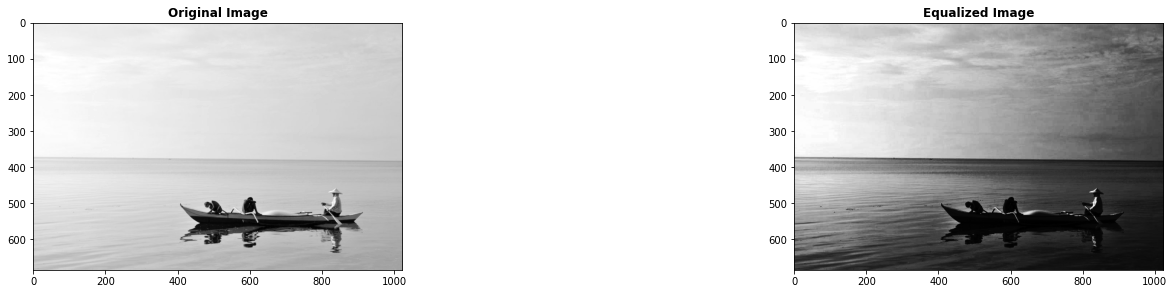

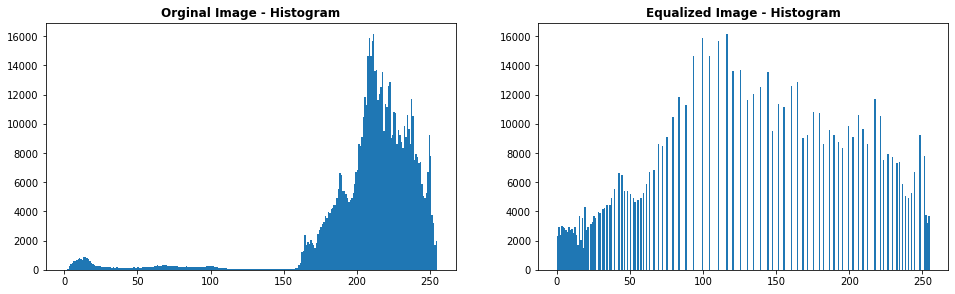

In [17]:
image_2_equalized = CalculateEqualizedImage(image_2, CalculateEqualizedHistogram(CalculateCumulativeHistogram(CalculateHistogram(image_2))))

RenderImage([image_2, image_2_equalized], ['Original Image', 'Equalized Image'], nrows = 2, ncols = 2)
RenderHistograms([image_2, image_2_equalized], ['Orginal Image - Histogram', 'Equalized Image - Histogram'])

## Image III - The Bridge

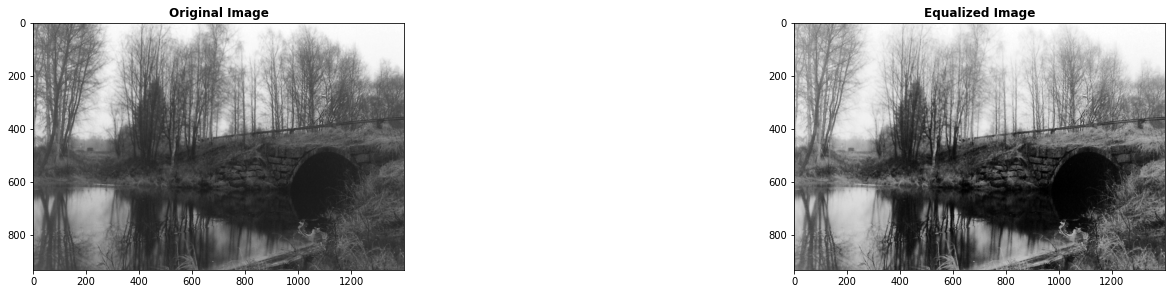

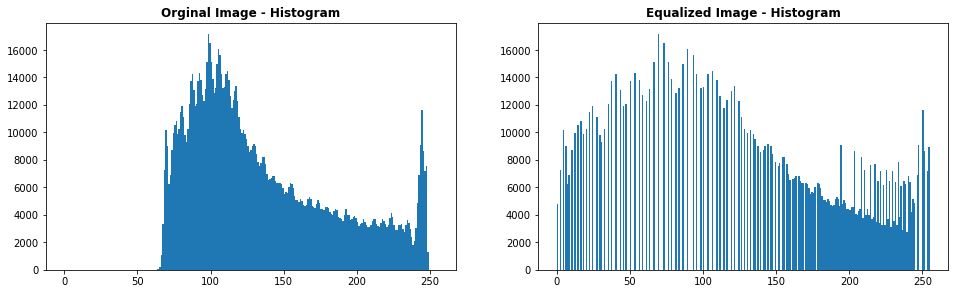

In [18]:
image_3_equalized = CalculateEqualizedImage(image_3, CalculateEqualizedHistogram(CalculateCumulativeHistogram(CalculateHistogram(image_3))))

RenderImage([image_3, image_3_equalized], ['Original Image', 'Equalized Image'], nrows = 2, ncols = 2)
RenderHistograms([image_3, image_3_equalized], ['Orginal Image - Histogram', 'Equalized Image - Histogram'])

## Image IV - The Sports Car

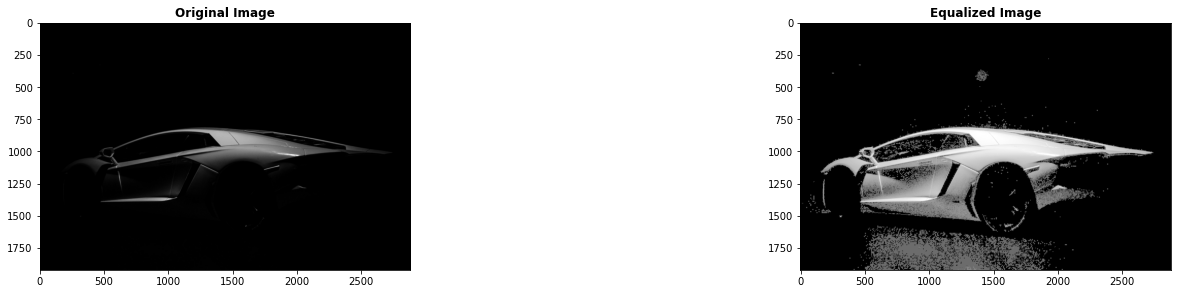

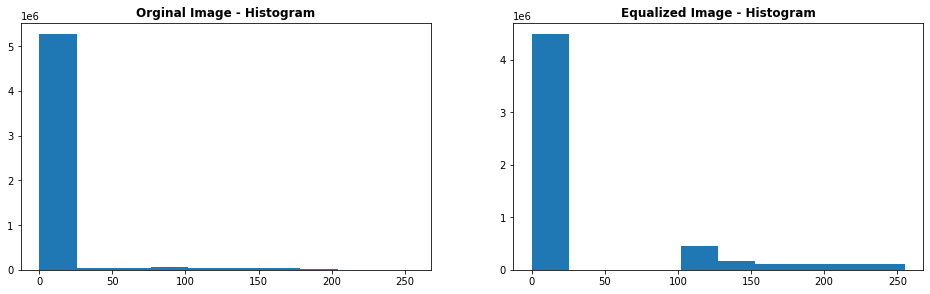

In [20]:
image_4_equalized = CalculateEqualizedImage(image_4, CalculateEqualizedHistogram(CalculateCumulativeHistogram(CalculateHistogram(image_4))))

RenderImage([image_4, image_4_equalized], ['Original Image', 'Equalized Image'], nrows = 2, ncols = 2)
RenderHistograms([image_4, image_4_equalized], ['Orginal Image - Histogram', 'Equalized Image - Histogram'], useBins = False)

## Image V - The Chain

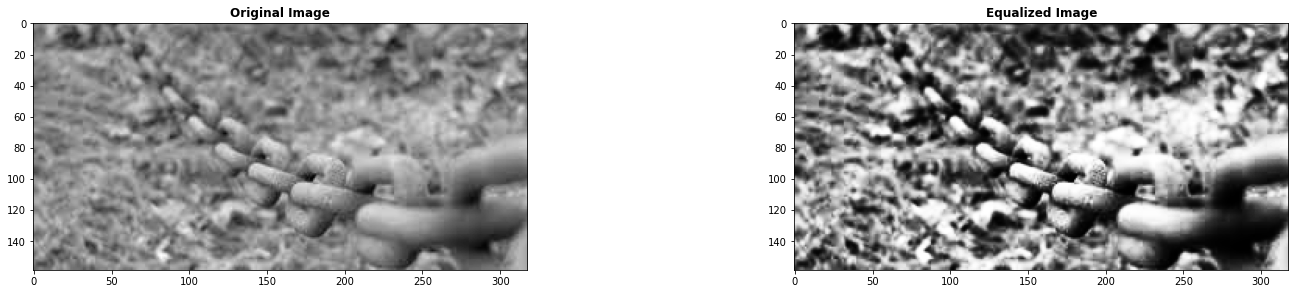

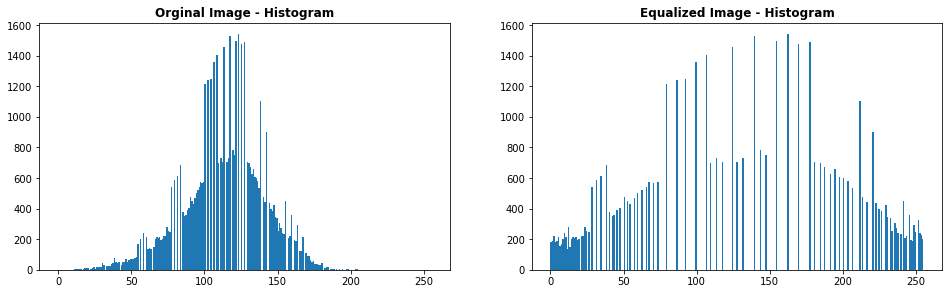

In [21]:
image_5_equalized = CalculateEqualizedImage(image_5, CalculateEqualizedHistogram(CalculateCumulativeHistogram(CalculateHistogram(image_5))))

RenderImage([image_5, image_5_equalized], ['Original Image', 'Equalized Image'], nrows = 2, ncols = 2)
RenderHistograms([image_5, image_5_equalized], ['Orginal Image - Histogram', 'Equalized Image - Histogram'])